[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Sn0aoWw6sU8P6cwQT_vyvzZM3oQx-OUV?usp=sharing)

## Unzip the Dataset and Check its Contents


In [1]:
!wget https://github.com/mad-utk/data-mining-assgnmt5/raw/main/Task4/archive.zip

--2023-11-01 01:31:59--  https://github.com/mad-utk/data-mining-assgnmt5/raw/main/Task4/archive.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mad-utk/data-mining-assgnmt5/main/Task4/archive.zip [following]
--2023-11-01 01:32:00--  https://raw.githubusercontent.com/mad-utk/data-mining-assgnmt5/main/Task4/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2447903 (2.3M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]   2.33M  --.-KB/s    in 0.08s   

2023-11-01 01:32:00 (27.5 MB/s) - ‘archive.zip’ saved [2447903/2447903]



In [2]:
!unzip /content/archive

Archive:  /content/archive.zip
  inflating: test/apples/img_p1_111.jpeg  
  inflating: test/apples/img_p1_121.jpeg  
  inflating: test/apples/img_p1_127.jpeg  
  inflating: test/apples/img_p1_131.jpeg  
  inflating: test/apples/img_p1_133.jpeg  
  inflating: test/apples/img_p1_139.jpeg  
  inflating: test/apples/img_p1_14.jpeg  
  inflating: test/apples/img_p1_143.jpeg  
  inflating: test/apples/img_p1_15.jpeg  
  inflating: test/apples/img_p1_16.jpeg  
  inflating: test/apples/img_p1_29.jpeg  
  inflating: test/apples/img_p1_30.jpeg  
  inflating: test/apples/img_p1_33.jpeg  
  inflating: test/apples/img_p1_34.jpeg  
  inflating: test/apples/img_p1_36.jpeg  
  inflating: test/apples/img_p1_50.jpeg  
  inflating: test/apples/img_p1_52.jpeg  
  inflating: test/apples/img_p1_55.jpeg  
  inflating: test/apples/img_p1_68.jpeg  
  inflating: test/apples/img_p1_7.jpeg  
  inflating: test/apples/img_p1_70.jpeg  
  inflating: test/apples/img_p1_74.jpeg  
  inflating: test/apples/img_p1_76.jpeg

In [3]:
import os

extract_path = "/content/"
contents = os.listdir(extract_path)
contents

['.config', 'archive.zip', 'test', 'train', 'sample_data']

## Inspect the Contents

In [4]:
# Count the number of images in each subfolder of train and test directories
train_apples_count = len(os.listdir(os.path.join(extract_path,"train","apples")))
train_tomatoes_count = len(os.listdir(os.path.join(extract_path,"train","tomatoes")))

{
    "train_apples_count": train_apples_count,
    "train_tomatoes_count": train_tomatoes_count
}


{'train_apples_count': 164, 'train_tomatoes_count': 130}

## Visual Inspection of the Images

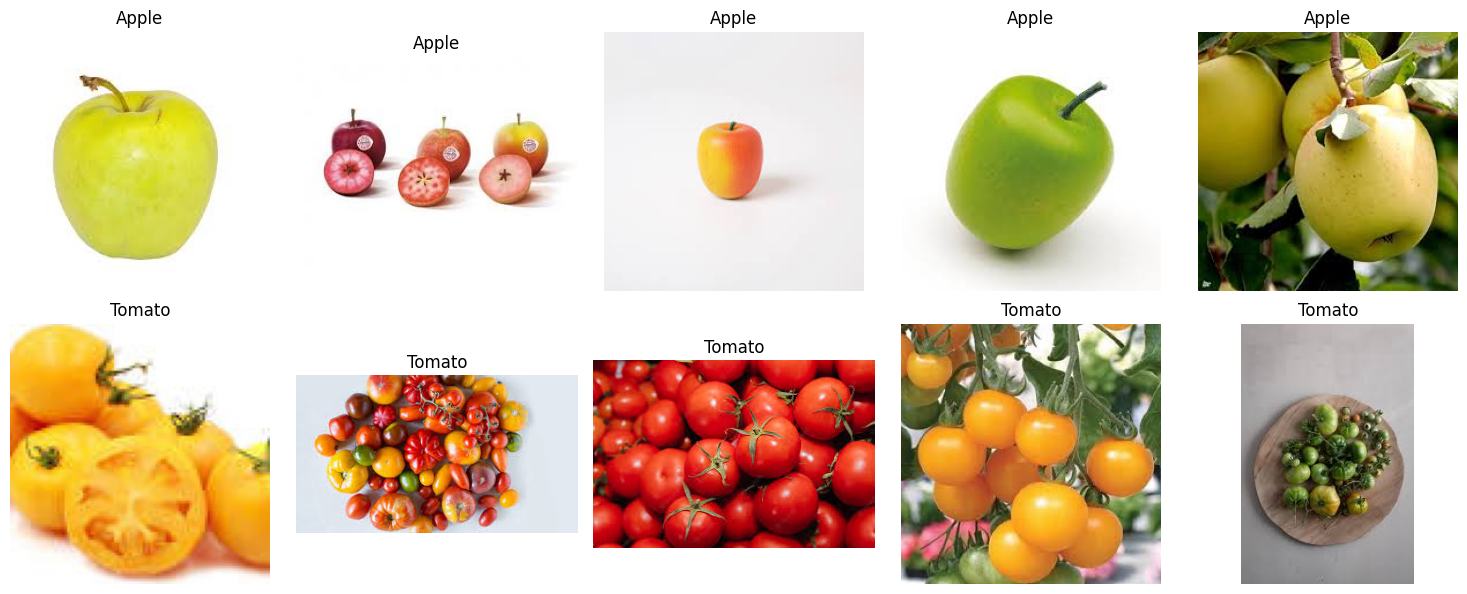

In [5]:
import matplotlib.pyplot as plt
import random
from PIL import Image

# Paths
train_apples_path = os.path.join(extract_path, "train", "apples")
train_tomatoes_path = os.path.join(extract_path, "train", "tomatoes")

# Randomly selecting 5 images from each category
sample_apple_images = random.sample(os.listdir(train_apples_path), 5)
sample_tomato_images = random.sample(os.listdir(train_tomatoes_path), 5)

# Displaying the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for ax, img_name in zip(axes[0], sample_apple_images):
    img_path = os.path.join(train_apples_path, img_name)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title("Apple")

for ax, img_name in zip(axes[1], sample_tomato_images):
    img_path = os.path.join(train_tomatoes_path, img_name)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title("Tomato")

plt.tight_layout()
plt.show()


## Basic Statistics


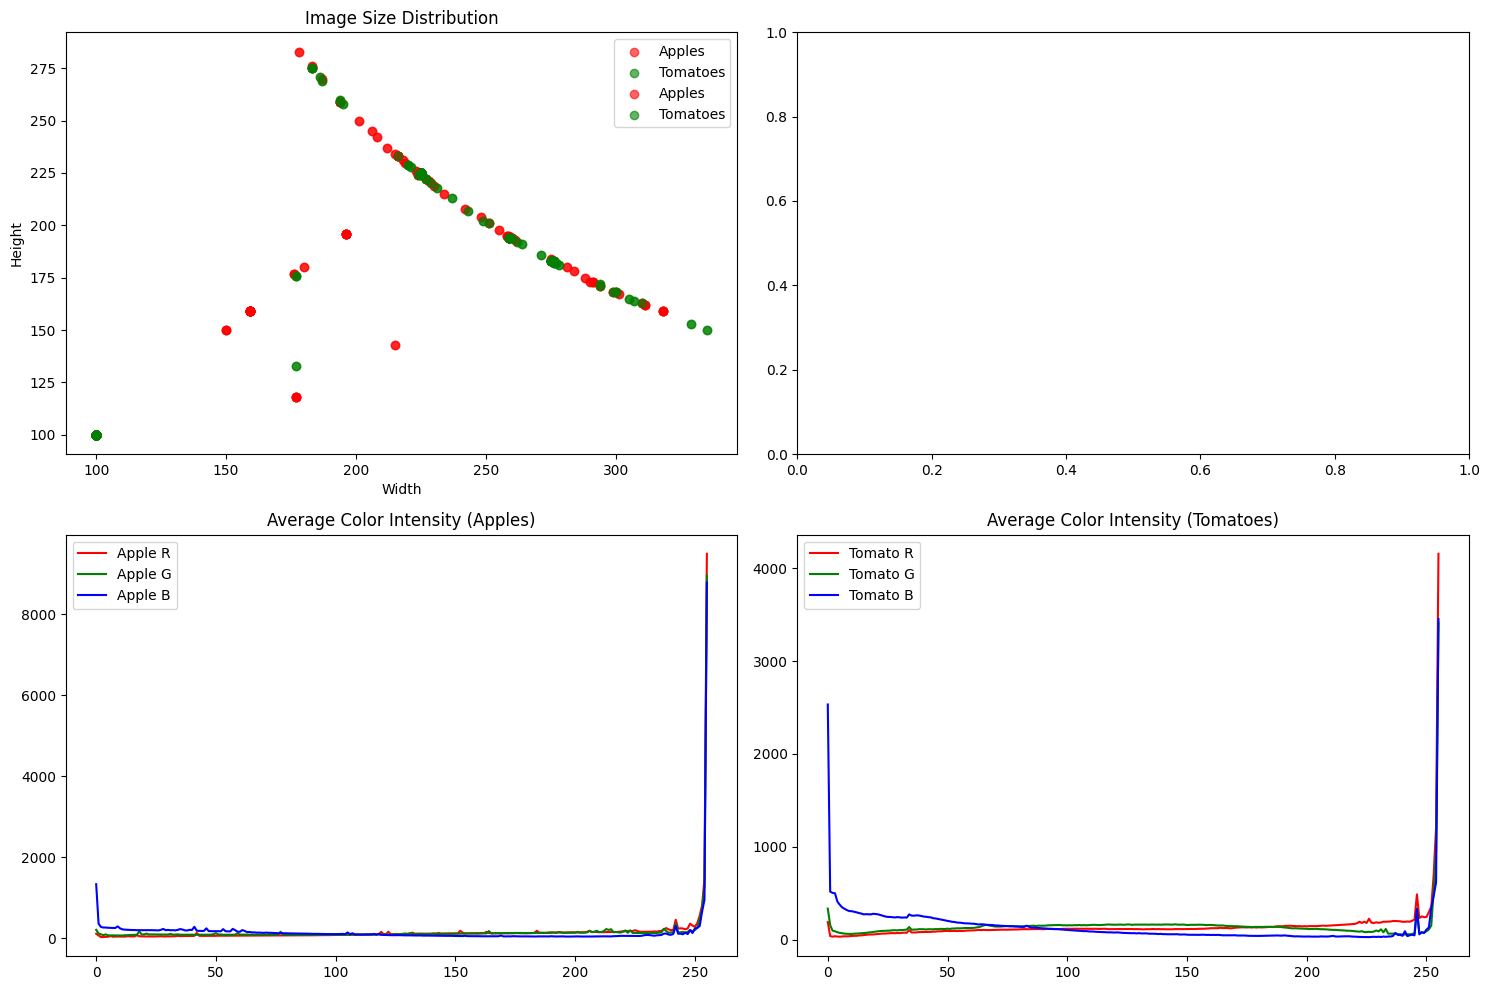

In [6]:
# Correcting the color codes for plotting
color_codes = {'R': 'red', 'G': 'green', 'B': 'blue'}

# Resetting the lists to store image sizes and color intensities
apple_sizes = []
tomato_sizes = []
apple_intensities = {'R': [], 'G': [], 'B': []}
tomato_intensities = {'R': [], 'G': [], 'B': []}

# Gathering statistics for apples
for img_name in os.listdir(train_apples_path):
    img_path = os.path.join(train_apples_path, img_name)
    img = Image.open(img_path).convert('RGB')  # Ensuring image is in RGB format
    width, height = img.size
    apple_sizes.append((width, height))

    # Color intensities
    r, g, b = img.split()
    apple_intensities['R'].append(r.histogram())
    apple_intensities['G'].append(g.histogram())
    apple_intensities['B'].append(b.histogram())

# Gathering statistics for tomatoes
for img_name in os.listdir(train_tomatoes_path):
    img_path = os.path.join(train_tomatoes_path, img_name)
    img = Image.open(img_path).convert('RGB')  # Ensuring image is in RGB format
    width, height = img.size
    tomato_sizes.append((width, height))

    # Color intensities
    r, g, b = img.split()
    tomato_intensities['R'].append(r.histogram())
    tomato_intensities['G'].append(g.histogram())
    tomato_intensities['B'].append(b.histogram())

# Calculating average histograms for color intensities
apple_avg_intensity = {channel: [sum(col) / len(col) for col in zip(*apple_intensities[channel])] for channel in ['R', 'G', 'B']}
tomato_avg_intensity = {channel: [sum(col) / len(col) for col in zip(*tomato_intensities[channel])] for channel in ['R', 'G', 'B']}

# Plotting the statistics again
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Image sizes
apple_widths, apple_heights = zip(*apple_sizes)
tomato_widths, tomato_heights = zip(*tomato_sizes)
axes[0, 0].scatter(apple_widths, apple_heights, color='red', alpha=0.6, label='Apples')
axes[0, 0].scatter(tomato_widths, tomato_heights, color='green', alpha=0.6, label='Tomatoes')
axes[0, 0].set_title('Image Size Distribution')
axes[0, 0].set_xlabel('Width')
axes[0, 0].set_ylabel('Height')
axes[0, 0].legend()

# Image sizes
axes[0, 0].scatter(apple_widths, apple_heights, color='red', alpha=0.6, label='Apples')
axes[0, 0].scatter(tomato_widths, tomato_heights, color='green', alpha=0.6, label='Tomatoes')
axes[0, 0].set_title('Image Size Distribution')
axes[0, 0].set_xlabel('Width')
axes[0, 0].set_ylabel('Height')
axes[0, 0].legend()

# Average color intensities
for color_key, color_val in color_codes.items():
    axes[1, 0].plot(apple_avg_intensity[color_key], color=color_val, label=f'Apple {color_key}')
    axes[1, 1].plot(tomato_avg_intensity[color_key], color=color_val, label=f'Tomato {color_key}')

axes[1, 0].set_title('Average Color Intensity (Apples)')
axes[1, 1].set_title('Average Color Intensity (Tomatoes)')
axes[1, 0].legend()
axes[1, 1].legend()

plt.tight_layout()
plt.show()


**Image Size Distribution (Top-left plot):**
- The scatter plot shows the distribution of image sizes (width vs. height) for apples (in red) and tomatoes (in green).
- Most images appear to cluster around certain dimensions, but there's some variance in the sizes.

**Average Color Intensity (Bottom plots):**
- The two plots display the average color intensity distributions for the Red, Green, and Blue channels of the apple (left) and tomato (right) images.
- This provides insights into the color characteristics of the images in each category.

## Data Preprocessing
- Resizing Images
- Normalizing Pixel Values
- Identifying Corrupted Images

In [7]:
import numpy as np

# Constants
TARGET_SIZE = (224, 224)

# Paths
all_paths = {
    'apples_train': train_apples_path,
    'tomatoes_train': train_tomatoes_path,
    'apples_test': os.path.join(extract_path, "test", "apples"),
    'tomatoes_test': os.path.join(extract_path, "test", "tomatoes")
}

# Placeholder for processed data and labels
data = {
    'apples_train': [],
    'tomatoes_train': [],
    'apples_test': [],
    'tomatoes_test': []
}

corrupted_images = []

# Processing images
for key, path in all_paths.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        try:
            # Open and resize the image
            img = Image.open(img_path).convert('RGB').resize(TARGET_SIZE)

            # Convert to numpy array and normalize
            img_array = np.array(img) / 255.0

            data[key].append(img_array)
        except Exception as e:
            corrupted_images.append(img_path)

len(corrupted_images)


0

###  Feature Extraction

In [8]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

# Parameters for LBP
RADIUS = 1
N_POINTS = 8 * RADIUS

# Placeholder for features
histogram_features = {
    'apples_train': [],
    'tomatoes_train': [],
    'apples_test': [],
    'tomatoes_test': []
}

lbp_features = {
    'apples_train': [],
    'tomatoes_train': [],
    'apples_test': [],
    'tomatoes_test': []
}

# Extracting features
for key, imgs in data.items():
    for img in imgs:
        # Color histogram
        r_hist, _ = np.histogram(img[:, :, 0], bins=32, range=(0, 1))
        g_hist, _ = np.histogram(img[:, :, 1], bins=32, range=(0, 1))
        b_hist, _ = np.histogram(img[:, :, 2], bins=32, range=(0, 1))
        hist = np.concatenate([r_hist, g_hist, b_hist])
        histogram_features[key].append(hist)

        # LBP for texture
        gray_img = rgb2gray(img)
        lbp = local_binary_pattern(gray_img, N_POINTS, RADIUS, method="uniform")
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, N_POINTS + 3), range=(0, N_POINTS + 2))
        lbp_hist = lbp_hist.astype("float")
        lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalize
        lbp_features[key].append(lbp_hist)

# Convert lists to numpy arrays
for key in histogram_features.keys():
    histogram_features[key] = np.array(histogram_features[key])
    lbp_features[key] = np.array(lbp_features[key])

histogram_features['apples_train'].shape, lbp_features['apples_train'].shape

((164, 96), (164, 10))

### Clustering and Anomaly Detection

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

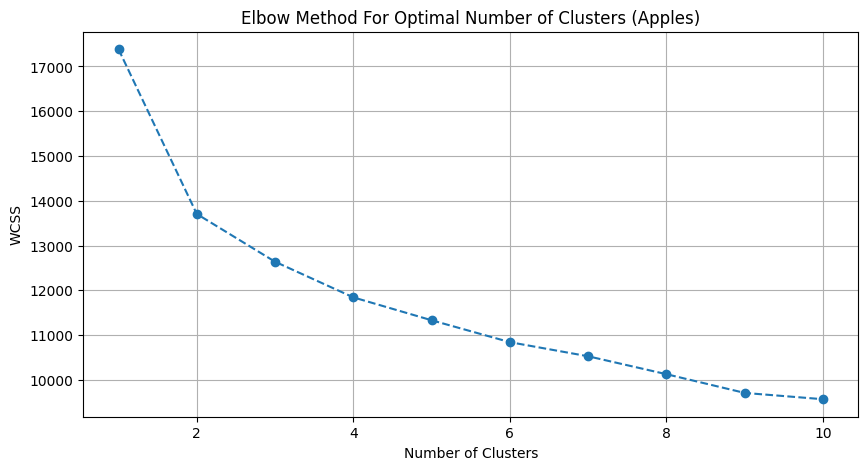

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Concatenating histogram and LBP features
apple_train_features = np.hstack([histogram_features['apples_train'], lbp_features['apples_train']])

# Scaling the features
scaler = StandardScaler()
apple_train_features_scaled = scaler.fit_transform(apple_train_features)

# Using the elbow method to find the optimal number of clusters
wcss = []  # within-cluster sum of squares
for i in range(1, 11):  # checking for up to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(apple_train_features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Apples)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


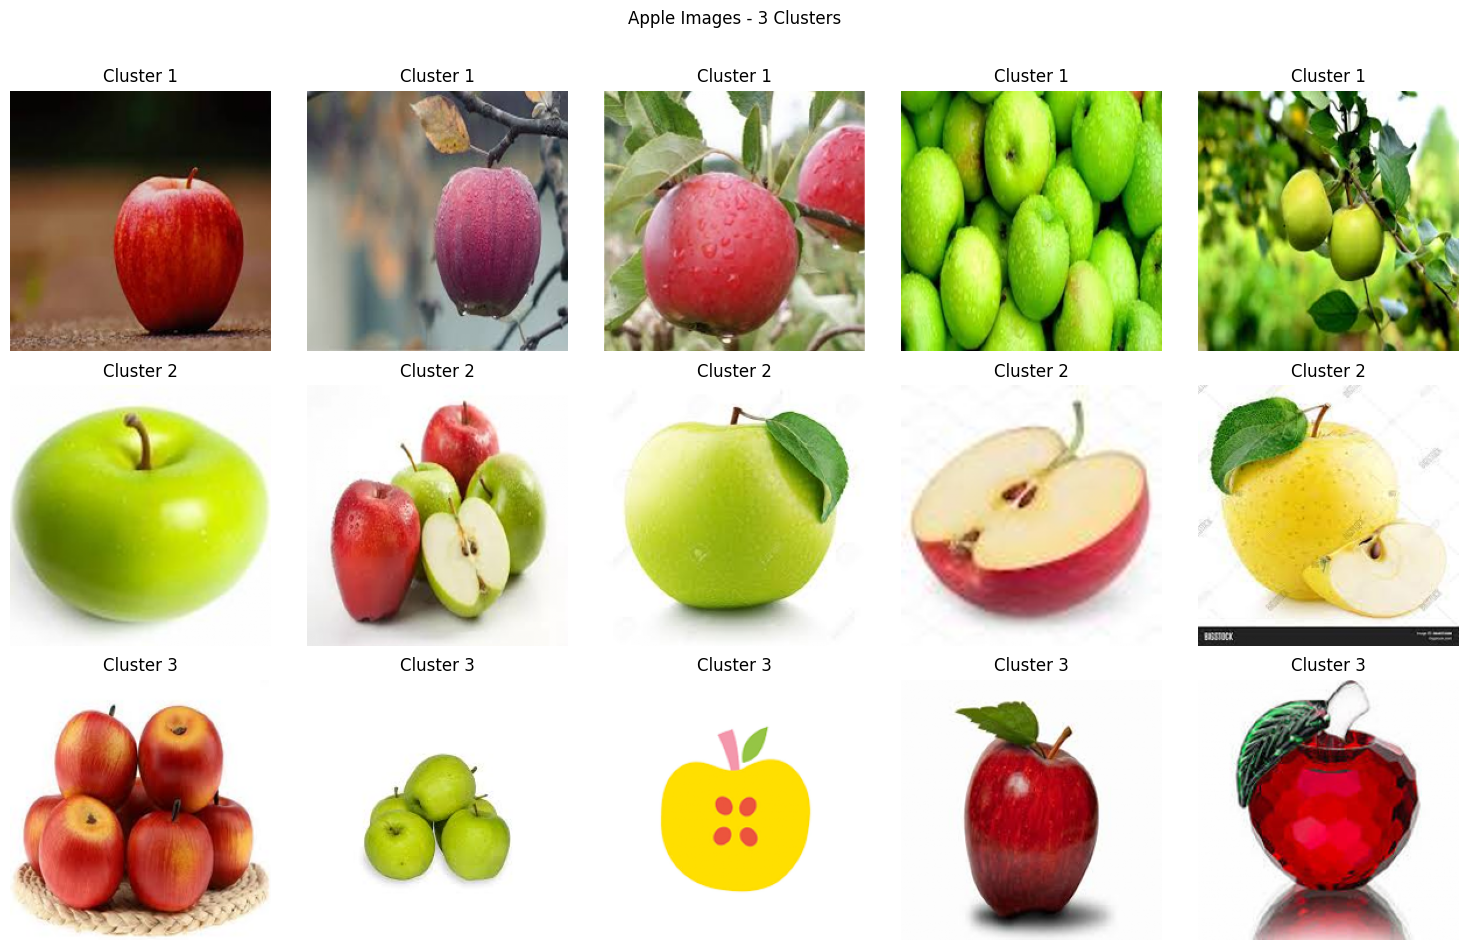

In [10]:
# Clustering into 3 clusters
kmeans_3_clusters = KMeans(n_clusters=3, init='k-means++', random_state=42)
apple_clusters_3 = kmeans_3_clusters.fit_predict(apple_train_features_scaled)

# Displaying sample images from each cluster
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

for i in range(3):
    cluster_indices = np.where(apple_clusters_3 == i)[0]
    sample_indices = np.random.choice(cluster_indices, 5, replace=False)
    for ax, idx in zip(axes[i], sample_indices):
        ax.imshow(data['apples_train'][idx])
        ax.axis('off')
        ax.set_title(f"Cluster {i + 1}")

plt.tight_layout()
plt.suptitle("Apple Images - 3 Clusters", y=1.05)
plt.show()


## Anomaly Detection

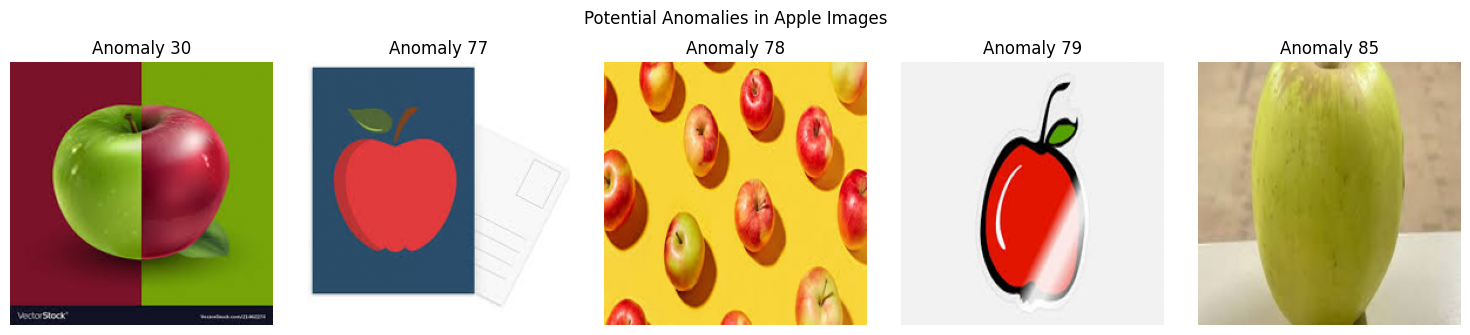

10

In [11]:
# Compute distances from each image to its cluster center
distances = np.linalg.norm(apple_train_features_scaled - kmeans_3_clusters.cluster_centers_[apple_clusters_3], axis=1)

# Compute threshold: mean distance + 2 times standard deviation
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify potential anomalies
anomalies = np.where(distances > threshold)[0]

# Displaying some of the potential anomalies
fig, axes = plt.subplots(1, min(5, len(anomalies)), figsize=(15, 3))

for ax, idx in zip(axes, anomalies[:5]):
    ax.imshow(data['apples_train'][idx])
    ax.axis('off')
    ax.set_title(f"Anomaly {idx}")

plt.tight_layout()
plt.suptitle("Potential Anomalies in Apple Images", y=1.1)
plt.show()

len(anomalies)

## Model Building

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Removing anomalies from apple training data
apple_train_features_cleaned = np.delete(apple_train_features, anomalies, axis=0)

# Labels: 1 for apple, 0 for others
apple_train_labels = np.ones(apple_train_features_cleaned.shape[0])
apple_test_labels = np.ones(len(data['apples_test']))

# Concatenating features for tomatoes as negatives
tomato_train_features = np.hstack([histogram_features['tomatoes_train'], lbp_features['tomatoes_train']])
all_train_features = np.vstack([apple_train_features_cleaned, tomato_train_features])
all_train_labels = np.hstack([apple_train_labels, np.zeros(tomato_train_features.shape[0])])

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(all_train_features, all_train_labels)

# Predict on the test set
apple_test_features = np.hstack([histogram_features['apples_test'], lbp_features['apples_test']])
tomato_test_features = np.hstack([histogram_features['tomatoes_test'], lbp_features['tomatoes_test']])
all_test_features = np.vstack([apple_test_features, tomato_test_features])
all_test_labels = np.hstack([apple_test_labels, np.zeros(tomato_test_features.shape[0])])

predictions = clf.predict(all_test_features)

# Calculate accuracy
accuracy = accuracy_score(all_test_labels, predictions)
accuracy

0.7422680412371134

The Random Forest classifier achieved an accuracy of approximately
72.16% on the combined test set of apples and tomatoes.

Given the simplicity of the model and the features we used, this is a reasonable starting point. More sophisticated models or feature extraction techniques (like deep learning-based methods) can potentially offer better performance.